In [1]:
import matplotlib.pyplot as plt

import numpy as np
import torch
from interpretability.comparison.fixedpoints import find_fixed_points
import os
from interpretability.comparison.analysis.tt.tt import Analysis_TT
# Import pca
from sklearn.decomposition import PCA
import glob
import cv2
import shutil
import imageio
import matplotlib.colors as mcolors

/home/csverst/miniconda3/envs/build5/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
suffix = "NBFF_GRU"
filepath1 = (
"/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240130_NBFF_test/"
)
plot_path = (
    "/home/csverst/Github/InterpretabilityBenchmark/"
    f"interpretability/comparison/plots/{suffix}/"
)
os.makedirs(plot_path, exist_ok=True)

comp = Analysis_TT(run_name=suffix, filepath=filepath1)


2024-01-30 14:28:13,274	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-30 14:28:14,115	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [11]:
fps = comp.compute_FPs(inputs = torch.zeros(3),
                       learning_rate=1e-3,
                       max_iters =  20000)


Iteration 500/20000
q = 1.61E-02 +/- 4.77E-02
dq = 7.83E-05 +/- 2.07E-04

Iteration 1000/20000
q = 2.87E-03 +/- 1.01E-02
dq = 6.81E-06 +/- 2.33E-05

Iteration 1500/20000
q = 1.16E-03 +/- 4.45E-03
dq = 1.65E-06 +/- 6.21E-06

Iteration 2000/20000
q = 6.39E-04 +/- 2.66E-03
dq = 6.51E-07 +/- 2.56E-06

Iteration 2500/20000
q = 4.03E-04 +/- 1.71E-03
dq = 3.42E-07 +/- 1.53E-06

Iteration 3000/20000
q = 2.70E-04 +/- 1.11E-03
dq = 2.04E-07 +/- 9.62E-07

Iteration 3500/20000
q = 1.88E-04 +/- 7.36E-04
dq = 1.30E-07 +/- 5.97E-07

Iteration 4000/20000
q = 1.36E-04 +/- 5.03E-04
dq = 8.56E-08 +/- 3.78E-07

Iteration 4500/20000
q = 9.97E-05 +/- 3.50E-04
dq = 5.98E-08 +/- 2.57E-07

Iteration 5000/20000
q = 7.43E-05 +/- 2.47E-04
dq = 4.28E-08 +/- 1.75E-07

Iteration 5500/20000
q = 5.61E-05 +/- 1.79E-04
dq = 3.08E-08 +/- 1.14E-07

Iteration 6000/20000
q = 4.28E-05 +/- 1.32E-04
dq = 2.28E-08 +/- 7.98E-08

Iteration 6500/20000
q = 3.30E-05 +/- 9.92E-05
dq = 1.70E-08 +/- 5.77E-08

Iteration 7000/20000
q = 

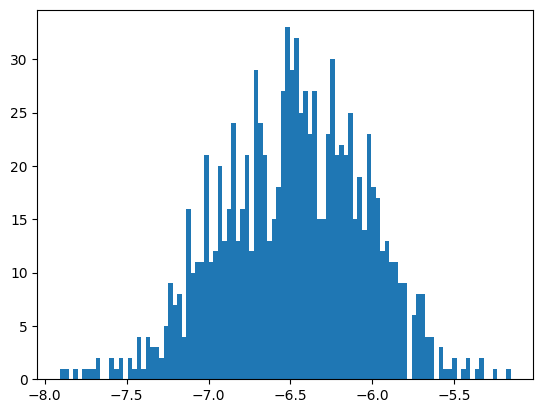

In [12]:
q_vals = fps.qstar
fig1= plt.hist(np.log10(q_vals), bins=100)


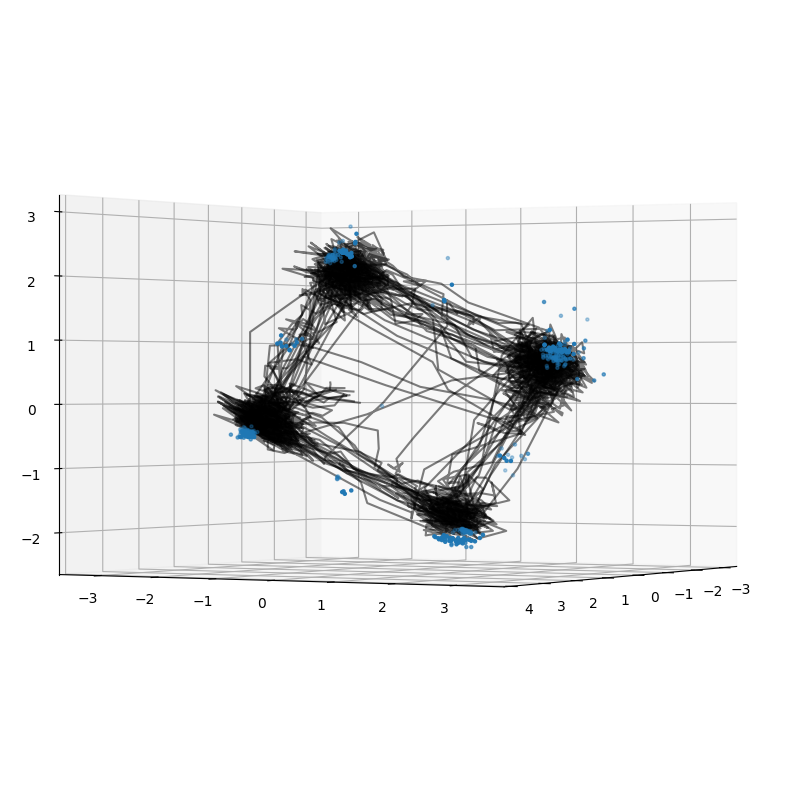

In [16]:
q_thresh = 3e-7
qFlag = q_vals < q_thresh
x_FP = fps.xstar[qFlag]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
pca = PCA(n_components=3)
pca.fit(x_FP)
x_pca = pca.transform(x_FP)
lats = comp.get_latents()
n_trials, n_time, n_lats = lats.shape
lats_pca = pca.transform(lats.reshape(-1, lats.shape[-1]))
lats_pca = lats_pca.reshape(n_trials, n_time, -1)
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], s=5)
for i in range(10):
    ax.plot(lats_pca[i, :, 0], lats_pca[i, :, 1], lats_pca[i, :, 2], color="k", alpha=0.5)
ax.view_init(0, 30)